# Modules

In [25]:
import math
import numpy as np
from pycbc.waveform import get_td_waveform
from pycbc import types, waveform
import lal
from lal import MSUN_SI, G_SI, MTSUN_SI, PC_SI, C_SI, PI
import matplotlib.pyplot as plt
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm

# NR data SXS:BBH:1364

In [26]:
rh_file='/home/pratul/Downloads/rhOverM_Asymptotic_GeometricUnits_CoM.h5'
rh_data=h5py.File(rh_file,'r')

# Frequency Comparison

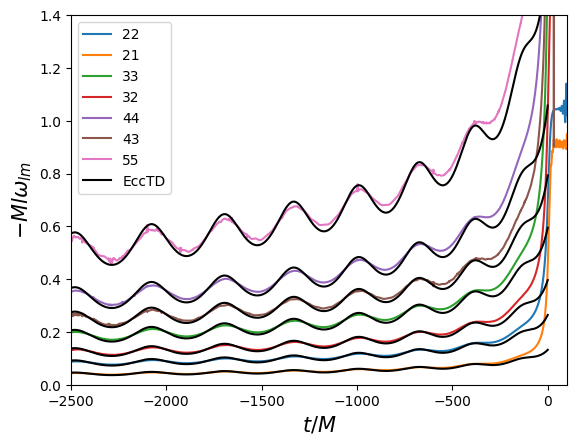

In [27]:
idx_set=['Extrapolated_N4.dir/Y_l2_m2.dat','Extrapolated_N4.dir/Y_l2_m1.dat','Extrapolated_N4.dir/Y_l3_m3.dat','Extrapolated_N4.dir/Y_l3_m2.dat','Extrapolated_N4.dir/Y_l4_m4.dat','Extrapolated_N4.dir/Y_l4_m3.dat','Extrapolated_N4.dir/Y_l5_m5.dat']
l=2
c=0 #counter
for i in idx_set:
    rh_P=np.array([])
    ret_time=rh_data[i][:,0]
    rh=rh_data[i][:,1]+1j*rh_data[i][:,2]
    for i in rh:
        rh_P=np.append(rh_P,(cm.phase(i)))
    rh_P=np.unwrap(rh_P)
    plt.plot(ret_time-3919.47469305,l*abs(np.gradient((rh_P),(ret_time))))
    c+=1
    if c==2 or c==4 or c==6 or c==8:
        l=l+1
        

q=2 #mass ratio
M=30 #Total mass
M1=q*M/(1+q)
M2=M/(1+q)
M_SI=M*MSUN_SI
D_SI=(10**6)*PC_SI
tvec= ret_time*M*MTSUN_SI
delta_t=np.abs(np.mean((np.diff(tvec))))
fmin=20
modetopolfac=4*(5/(64*np.pi))**(1/2)


hp,hc=get_td_waveform(approximant='EccentricTD',mass1=M1,mass2=M2,delta_t=delta_t,f_lower=fmin,eccentricity=0.120)  
A_EccTD = waveform.utils.amplitude_from_polarizations(hp/(modetopolfac*(G_SI*M_SI/D_SI/C_SI/C_SI)), hc/(modetopolfac*(G_SI*M_SI/D_SI/C_SI/C_SI)))
phase_EccTD = waveform.utils.phase_from_polarizations(hp/(modetopolfac*(G_SI*M_SI/D_SI/C_SI/C_SI)), hc/(modetopolfac*(G_SI*M_SI/D_SI/C_SI/C_SI)))        
tvec=hp.sample_times/(M*MTSUN_SI)  


omegaEcc22 = (M*MTSUN_SI/delta_t)*(np.gradient(phase_EccTD))
omegaEcc21 = (M*MTSUN_SI/delta_t)*(np.gradient(phase_EccTD*(1./2)))
omegaEcc33 = (M*MTSUN_SI/delta_t)*(np.gradient(phase_EccTD*(3./2)))
omegaEcc44 = (M*MTSUN_SI/delta_t)*(np.gradient(phase_EccTD*(4./2)))
omegaEcc43 = (M*MTSUN_SI/delta_t)*(np.gradient(phase_EccTD*(3./2)))
omegaEcc32 = (M*MTSUN_SI/delta_t)*(np.gradient(phase_EccTD*(2./2)))
omegaEcc55 = (M*MTSUN_SI/delta_t)*(np.gradient(phase_EccTD*(5./2)))


plt.plot(tvec,2*omegaEcc22,'k-')
plt.plot(tvec,2*omegaEcc21,'k-')
plt.plot(tvec,3*omegaEcc33,'k-')
plt.plot(tvec,4*omegaEcc44,'k-')
plt.plot(tvec,4*omegaEcc43,'k-')
plt.plot(tvec,3*omegaEcc32,'k-')
plt.plot(tvec,5*omegaEcc55,'k-')

        
plt.legend(['22','21','33','32','44','43','55','EccTD'])
plt.ylim(0,1.4)
plt.xlim(-2500,100)
plt.ylabel(r'$-Ml\omega_{lm}$',size=15)
plt.xlabel(r'$t/M$',size=15)
plt.show()

# Amplitude Comparison

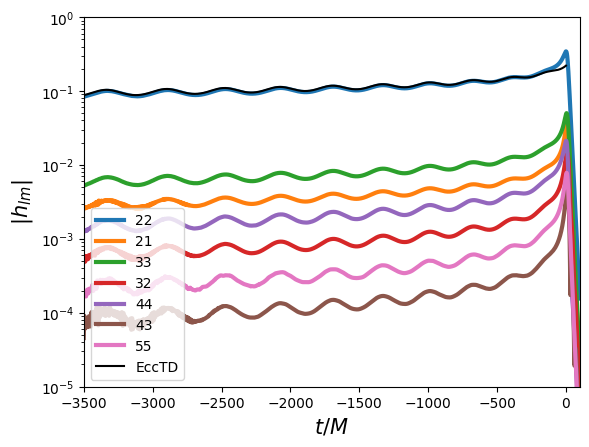

In [28]:
idx_set=['Extrapolated_N4.dir/Y_l2_m2.dat','Extrapolated_N4.dir/Y_l2_m1.dat','Extrapolated_N4.dir/Y_l3_m3.dat','Extrapolated_N4.dir/Y_l3_m2.dat','Extrapolated_N4.dir/Y_l4_m4.dat','Extrapolated_N4.dir/Y_l4_m3.dat','Extrapolated_N4.dir/Y_l5_m5.dat']
for i in idx_set:
    ret_time=rh_data[i][:,0]
    rh=rh_data[i][:,1]+1j*rh_data[i][:,2]
    ind=np.where(abs(rh)==np.max(abs(rh)))[0][0]
    plt.semilogy(ret_time-3919.47469305,abs(rh),linewidth=3)
plt.ylim(0.00001,1)
plt.xlim(-3500,100)
tvec=hp.sample_times/(M*MTSUN_SI)
plt.semilogy(tvec,A_EccTD,'k-',label='EccTD')
plt.ylabel(r'$|h_{lm}|$',size=15)
plt.xlabel(r'$t/M$',size=15)
plt.legend(['22','21','33','32','44','43','55','EccTD'])